 # Задача Коши

$$y'=1-sin(1.25x+y)-\frac{0.1y}{2+x}, y(0)=0$$

In [1]:
import pandas as pd
import numpy as np

1)Таблица значений решения задачи

In [2]:
y_math = [0, 0.1, 0.177213, 0.234974, 0.276668, 0.305424]
xx = [round(x, 2) for x in np.arange(0, 0.6, 0.1)]
indexes = ["$y$"]
table1 = pd.DataFrame(y_math, index = xx, columns = indexes)
table1.columns.name = "$x$"
display(table1)

$x$,$y$
0.0,0.000000
0.1,0.100000
0.2,0.177213
0.3,0.234974
0.4,0.276668
0.5,0.305424


2)Метод Эйлера улучшенный

3) Напечатать таблицу значений $y_{math}, y^h, y_{rev},y_{rev}-y_{math}$

In [3]:
a, b, h, h_2 = 0, 0.5, 0.1, 0.05
y_a = 0
n = len(xx)
y_h = [0]*n
y_h[0] = y_a

def f(x, y):
    val = 1 - np.sin(1.25 * x + y) - (0.1 * y) / (2 + x)
    return val

def Euler(y, x, h):
    for i in range(1, len(y)):
        val_1 = f(x[i - 1], y[i - 1])
        Y_m = y[i - 1] + h * val_1
        val_2 = f(x[i], Y_m)
        y[i] = y[i - 1] + h / 2 * (val_1 + val_2)
    return y

y_h = Euler(y_h, xx, h)

xx_2 = [round(x, 2) for x in np.arange(0, 0.6, h_2)]
n_2 = len(xx_2)
Y_h_2 = [0]*n_2
y_h_2 = [0]*n
Y_h_2[0] = y_a

Y_h_2 = Euler(Y_h_2, xx_2, h_2)
for i in range(0, n_2, 2):
    y_h_2[i//2] = Y_h_2[i]

R = [0]*n
y_rev = [0]*n
s = 2

for i in range(n):
    R[i] = (y_h_2[i] - y_h[i])/(2**s - 1)
    y_rev[i] = y_h_2[i] + R[i]

errs = [0]*n
for i in range(n):
    errs[i] = y_rev[i] - y_math[i]
data = [y_h, y_h_2, y_rev, errs]
indexes = [
    "y_h",
    "y_h_2",
    "y_rev",
    "y_rev - y_math"
]
table2 = pd.DataFrame(data, index= indexes, columns=xx).T
table2.columns.name = "$x$"
display(table2)

$x$,y_h,y_h_2,y_rev,y_rev - y_math
0.0,0.000000,0.000000,0.000000,0.000000
0.1,0.088607,0.088859,0.088943,-0.011057
0.2,0.157166,0.157552,0.157681,-0.019532
0.3,0.208643,0.209076,0.209220,-0.025754
0.4,0.245931,0.246353,0.246494,-0.030174
0.5,0.271702,0.272076,0.272201,-0.033223


4)Построить графики заданных таблично функций в одних осях координат

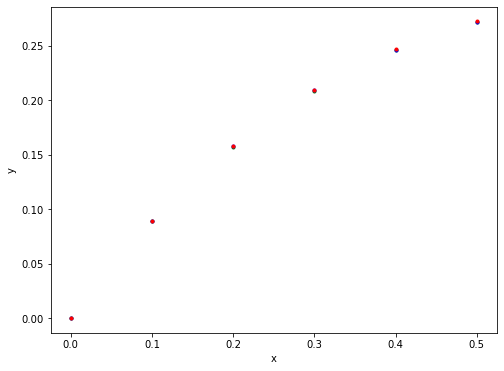

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(xx, y_h, 'g.')
ax.plot(xx, y_h_2, 'b.')
ax.plot(xx, y_rev, 'r.')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

5) Вычислить решение мотодом РУнге-Кнутты 4-го порядка

In [5]:
def Runge_Kut(y, x, h):

    for i in range(1, len(y)):
        k1 = h*f(x[i-1], y[i-1])
        k2 = h*f(x[i-1] + h/2, y[i-1] +k1/2)
        k3 = h*f(x[i-1] + h/2, y[i-1] +k2/2)
        k4 = h*f(x[i-1] + h, y[i-1] +k3)
        y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 +k4)*(1/6)
    return y

xx_2 = [round(x, 2) for x in np.arange(0, 0.6, h_2)]
n_2 = len(xx_2)
Y_RK_2 = [0]*n_2
y_RK_2 = [0]*n
Y_RK_2[0] = y_a

Y_RK_2 = Runge_Kut(Y_RK_2, xx_2, h_2)
for i in range(0, n_2, 2):
    y_RK_2[i//2] = Y_RK_2[i]

errs_RK_2 = [0]*n
for i in range(n):
    errs_RK_2[i] = np.abs(y_RK_2[i] - y_math[i] )

print("Решения, полученные методом Рунге-Кутты", y_RK_2)
print("Погрешность: ", errs_RK_2)

Решения, полученные методом Рунге-Кутты [0, 0.0889404120646352, 0.157677387266089, 0.20921728864481295, 0.24649311927953876, 0.27220160555376705]
Погрешность:  [0, 0.011059587935364809, 0.019535612733911023, 0.025756711355187034, 0.03017488072046126, 0.03322239444623293]


6) Вычислить решение экстраполяционны методом Адамся 4-го порядка

In [6]:
def Adams_ex(y, x, h):
    for i in range(5, len(y)):
        q_4 = h*f(x[i-5], y[i-5])
        q_3 = h*f(x[i-4], y[i-4])
        q_2 = h*f(x[i-3], y[i-3])
        q_1 = h*f(x[i-2], y[i-2])
        q_0 = h*f(x[i-1], y[i-1])
        y[i] = y[i-1] + (1/720)*(1901*q_0 - 2774*q_1 + 2616*q_2 - 1274*q_3 + 251*q_4)
    return y

xx = [round(x, 2) for x in np.arange(4*h_2, 0.5+h_2, h_2)]
y_Ad_ex = [0]*len(xx)
for i in range(5):
    y_Ad_ex[i] = Y_RK_2[i+4]
y_Ad_ex = Adams_ex(y_Ad_ex, xx, h_2)

7) Вычислить решение интерполяционным методом Адамса 4-го порядка

In [7]:
def Adams_in(y_ex, y, x, h):
    for i in range(4, len(y)):
        q_3 = h * f(x[i - 4], y[i - 4])
        q_2 = h * f(x[i - 3], y[i - 3])
        q_1 = h * f(x[i - 2], y[i - 2])
        q_0 = h * f(x[i - 1], y[i - 1])

        y_0 = y_ex[i]
        q_4 = h*f(x[i], y_0)
        y_1 = y[i-1] + (1/720)*(251*q_4 + 646*q_0 - 264*q_1 + 106*q_2 - 19*q_3)
        k=0
        while np.abs(y_1 - y_0) >= 0.0001 and k!=10:
            y_0 = y_1
            q_4 = h * f(x[i], y_0)
            y_1 = y[i - 1] + (1 / 720) * (251 * q_4 + 646 * q_0 - 264 * q_1 + 106 * q_2 - 19 * q_3)
            k+=1
        y[i] = y_1

    return y
xx = [round(x, 2) for x in np.arange(4*h_2, 0.5+h_2, h_2)]
y_Ad_in = [0]*len(xx)
for i in range(4):
    y_Ad_in[i] = Y_RK_2[i+4]
y_Ad_in = Adams_in(y_Ad_ex, y_Ad_in, xx, h_2)

8) Напечатать таблицу значений решений $y_{math}$  и погрешностей $y_{math}-y_{RK}, y_{math}-y_{Ad_{ex}},y_{math}-y_{Ad_{in}}$

In [8]:
y_math_2 = [0.167095, 0.19646, 0.22166, 0.243084, 0.261105, 0.276075, 0.288327]

errs1 = [0]*len(xx)
errs2 = [0]*len(xx)

for i in range(len(xx)):
    errs1[i] = y_math_2[i] - y_Ad_ex[i]
    errs2[i] = y_math_2[i] - y_Ad_in[i]

data = [y_Ad_ex, errs1, y_Ad_in, errs2]
indexes = [
    "y_AD_ex",
    "y_math - y_AD_ex",
    "y_AD_in",
    "y_math - y_AD_in"
]
table3 = pd.DataFrame(data, index= indexes, columns=xx).T
table3.columns.name = "$x$"
display(table3)

$x$,y_AD_ex,y_math - y_AD_ex,y_AD_in,y_math - y_AD_in
0.20,0.157677,0.009418,0.157677,0.009418
0.25,0.185409,0.011051,0.185409,0.011051
0.30,0.209217,0.012443,0.209217,0.012443
0.35,0.229463,0.013621,0.229463,0.013621
0.40,0.246493,0.014612,0.246493,0.014612
0.45,0.260635,0.015440,0.260636,0.015439
0.50,0.272201,0.016126,0.272202,0.016125
